# Fantasy Premier League Project 

# TOTAL POINTS

### Libraries 

In [1]:
import glob
import pandas as pd
import seaborn as sns
import numpy as np
import category_encoders as ce
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# extract Features and target variables
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

# Machine Learning Library
from sklearn.preprocessing import LabelEncoder # Encode Categorical Variable to Numerical Variable
from sklearn.impute import SimpleImputer # Imputer Class to replace missing values
from sklearn.metrics import confusion_matrix # Library for model evaluation
from sklearn.model_selection import train_test_split # Library to split datset into test and train

from sklearn.linear_model  import LogisticRegression # Logistic Regression Classifier
from sklearn.linear_model import SGDClassifier # Stochastic Gradient Descent Classifier
from sklearn.tree import DecisionTreeClassifier # Decision Tree Classifier
from sklearn.ensemble  import RandomForestClassifier # Random Forest Classifier
from sklearn.neighbors import KNeighborsClassifier # K Nearest neighbors Classifier
from sklearn.naive_bayes import GaussianNB #Naive Bayes Classifier
from sklearn.svm import SVC #Support vector Machine Classifier
from sklearn.ensemble import AdaBoostClassifier # Ada Boost Classifier
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

### File reading

In [2]:
#list all csv files
fpl_files_23 = glob.glob('gw*_1.{}'.format('csv')) #fpl 2022-23 files

In [3]:
fpl_23= pd.concat([pd.read_csv(f) for f in fpl_files_23 ], ignore_index=True)
fpl_23.head()

C:\Users\Joseph\AppData\Local\Temp\ipykernel_2328\180186912.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fpl_23= pd.concat([pd.read_csv(f) for f in fpl_files_23 ], ignore_index=True)


,name,position,team,xP,assists,bonus,bps,clean_sheets,creativity,element,...,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards
0,Nathan Redmond,MID,Southampton,0.0,0,0,0,0,0.0,403,...,0,4,0.0,0,-312,0,312,53,False,0
1,Junior Stanislas,MID,Bournemouth,-0.1,0,0,0,0,0.0,58,...,1,2,0.0,0,-159,90,249,48,True,0
2,Armando Broja,FWD,Chelsea,3.5,0,0,27,0,0.3,150,...,0,3,17.0,5,-2457,2715,5172,53,True,0
3,Fabian Schär,DEF,Newcastle,3.3,0,0,10,0,0.5,366,...,1,5,2.0,2,121324,161290,39966,48,True,0
4,Jonny Evans,DEF,Leicester,2.5,0,0,15,0,1.5,249,...,1,2,33.0,1,2549,3862,1313,44,False,0


## PREPROCESSING

In [4]:
fpl_23.dtypes.head()
#We see that many features have tthe incorect data type (object). 

name         object
position     object
team         object
xP          float64
assists      object
dtype: object

In [5]:
#We transform all the strings which represent numeric values, to floats.

fpl_23[['value','total_points','assists','bonus','bps','clean_sheets','element','minutes','goals_conceded','goals_scored','own_goals','penalties_missed','penalties_saved','red_cards','saves','selected','starts','team_a_score','team_h_score','transfers_balance','transfers_in','transfers_out',"yellow_cards"]]=fpl_23[['value','total_points','assists','bonus','bps','clean_sheets','element','minutes','goals_conceded','goals_scored','own_goals','penalties_missed','penalties_saved','red_cards','saves','selected','starts','team_a_score','team_h_score','transfers_balance','transfers_in','transfers_out',"yellow_cards"]].astype(float)
fpl_23

,name,position,team,xP,assists,bonus,bps,clean_sheets,creativity,element,...,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards
0,Nathan Redmond,MID,Southampton,0.0,0.0,0.0,0.0,0.0,0.0,403.0,...,0.0,4.0,0.0,0.0,-312.0,0.0,312.0,53.0,False,0.0
1,Junior Stanislas,MID,Bournemouth,-0.1,0.0,0.0,0.0,0.0,0.0,58.0,...,1.0,2.0,0.0,0.0,-159.0,90.0,249.0,48.0,True,0.0
2,Armando Broja,FWD,Chelsea,3.5,0.0,0.0,27.0,0.0,0.3,150.0,...,0.0,3.0,17.0,5.0,-2457.0,2715.0,5172.0,53.0,True,0.0
3,Fabian Schär,DEF,Newcastle,3.3,0.0,0.0,10.0,0.0,0.5,366.0,...,1.0,5.0,2.0,2.0,121324.0,161290.0,39966.0,48.0,True,0.0
4,Jonny Evans,DEF,Leicester,2.5,0.0,0.0,15.0,0.0,1.5,249.0,...,1.0,2.0,33.0,1.0,2549.0,3862.0,1313.0,44.0,False,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26500,Oliver Skipp,MID,Spurs,0.5,0.0,0.0,7.0,0.0,0.0,441.0,...,1.0,3.0,0.0,1.0,-110.0,736.0,846.0,44.0,False,0.0
26501,Ryan Sessegnon,DEF,Spurs,1.0,0.0,0.0,3.0,0.0,0.2,436.0,...,1.0,3.0,0.0,1.0,-6915.0,4177.0,11092.0,45.0,False,0.0
26502,Ashley Young,DEF,Aston Villa,6.5,0.0,2.0,33.0,1.0,61.9,538.0,...,0.0,0.0,6.0,8.0,957.0,1875.0,918.0,44.0,False,0.0
26503,Jeremy Sarmiento Morante,MID,Brighton,-1.0,0.0,0.0,0.0,0.0,0.0,119.0,...,3.0,3.0,0.0,0.0,-246.0,64.0,310.0,45.0,False,0.0


In [6]:
fpl_23.dtypes.head()

name         object
position     object
team         object
xP          float64
assists     float64
dtype: object

### Exploratory data analysis

In [7]:
fpl_23.describe()
#Short summary for descriptive statistics.

,xP,assists,bonus,bps,clean_sheets,creativity,element,expected_assists,expected_goal_involvements,expected_goals,...,starts,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,yellow_cards
count,26505.000000,26505.000000,26505.000000,26505.000000,26505.000000,26505.000000,26505.000000,26505.000000,26505.000000,26505.000000,...,26505.000000,26505.000000,26505.000000,26505.000000,26505.000000,2.650500e+04,2.650500e+04,2.650500e+04,26505.000000,26505.000000
mean,1.229708,0.034975,0.091945,5.174080,0.087191,3.986636,352.155442,0.016567,0.041239,0.027600,...,0.202528,1.219694,1.628825,4.106206,1.196906,2.104428e+03,1.612256e+04,1.401812e+04,49.188304,0.051651
std,2.085657,0.197954,0.455495,9.092054,0.282120,9.797862,206.078173,0.067103,0.148375,0.120924,...,0.401891,1.188182,1.402969,11.287927,2.355236,7.691967e+04,6.821878e+04,5.738149e+04,11.288173,0.221325
min,-3.000000,0.000000,0.000000,-21.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-4.000000,-2.180978e+06,0.000000e+00,0.000000e+00,37.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,175.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,-1.087000e+03,2.700000e+01,9.200000e+01,43.000000,0.000000
50%,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,349.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,-5.400000e+01,3.010000e+02,8.010000e+02,45.000000,0.000000
75%,1.900000,0.000000,0.000000,8.000000,0.000000,1.400000,524.000000,0.000000,0.000000,0.000000,...,0.000000,2.000000,2.000000,2.000000,1.000000,3.300000e+01,3.885000e+03,6.310000e+03,51.000000,0.000000
max,23.600000,3.000000,3.000000,102.000000,1.000000,124.000000,778.000000,1.285270,2.380000,2.370000,...,1.000000,6.000000,9.000000,169.000000,23.000000,1.332069e+06,1.384843e+06,2.233619e+06,131.000000,1.000000


In [8]:
fpl_23["total_points"].mean()

1.1969062441048859

In [9]:
fpl_23.groupby("name")["total_points"].agg(["max","min","mean","median"]).sort_values(by="mean",ascending=False).head()

,max,min,mean,median
name,,,,
Erling Haaland,23.0,0.0,7.157895,6.0
Harry Kane,16.0,1.0,6.921053,7.0
Mohamed Salah,21.0,0.0,6.289474,5.0
Martin Ødegaard,16.0,0.0,5.578947,3.0
Marcus Rashford,18.0,0.0,5.394737,3.0


## Checking for missing or NA values.

#### We check our data frame for both missing or NA values

In [10]:
missing_val=fpl_23.isnull().sum()
missing_val[0:]

name                          0
position                      0
team                          0
xP                            0
assists                       0
bonus                         0
bps                           0
clean_sheets                  0
creativity                    0
element                       0
expected_assists              0
expected_goal_involvements    0
expected_goals                0
expected_goals_conceded       0
fixture                       0
goals_conceded                0
goals_scored                  0
ict_index                     0
influence                     0
kickoff_time                  0
minutes                       0
opponent_team                 0
own_goals                     0
penalties_missed              0
penalties_saved               0
red_cards                     0
round                         0
saves                         0
selected                      0
starts                        0
team_a_score                  0
team_h_s

In [11]:
na_val=fpl_23.isna().sum()
na_val[0:]

name                          0
position                      0
team                          0
xP                            0
assists                       0
bonus                         0
bps                           0
clean_sheets                  0
creativity                    0
element                       0
expected_assists              0
expected_goal_involvements    0
expected_goals                0
expected_goals_conceded       0
fixture                       0
goals_conceded                0
goals_scored                  0
ict_index                     0
influence                     0
kickoff_time                  0
minutes                       0
opponent_team                 0
own_goals                     0
penalties_missed              0
penalties_saved               0
red_cards                     0
round                         0
saves                         0
selected                      0
starts                        0
team_a_score                  0
team_h_s

## Boxplots for checking outliers for our target value (total points)

C:\Users\Joseph\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


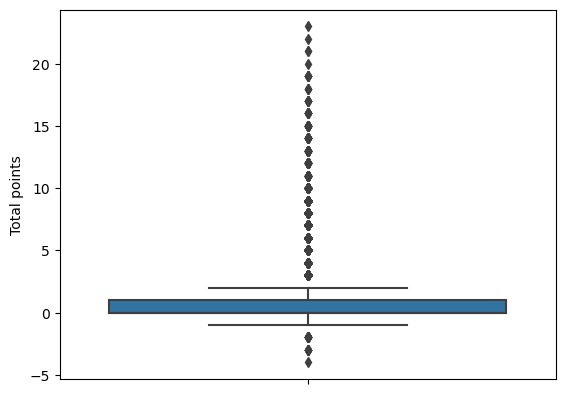

In [12]:
fig, ax = plt.subplots()
sns.boxplot(data=fpl_23, y='total_points')
ax.set_ylabel('Total points')
plt.show()

We see from the boxplot that we have too many outliers.
This is likely happens because we take into account all the players in the premier league, even the ones that have little play time.
__These players have few to none points dragging down the mean, making the other regular players look like outliers.__

### Since we dont care much about any players with barely any game time we tried removing them.

In [13]:
# Calculate the mean of column 'minutes' for each player
player_means = fpl_23.groupby('name')['minutes'].mean()

# Filter for players with mean minutes equal to 0
players_with_mean_zero = player_means[player_means ==0]

# Remove players with mean minutes equal to 0 from the original DataFrame
fpl_23 = fpl_23[~fpl_23['name'].isin(players_with_mean_zero.index)]


C:\Users\Joseph\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


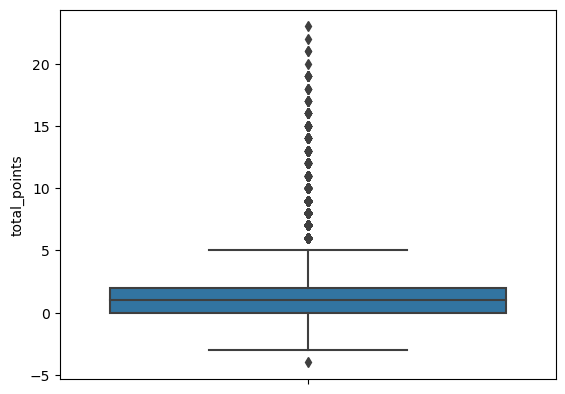

In [14]:
fig, ax = plt.subplots()
sns.boxplot(data=fpl_23, y='total_points')
ax.set_ylabel('total_points')
plt.show()


#### We can see that we still have too many outliers. So we considered taking into consideration only the players which have more playtime.

In [15]:
# We repeat the same process as before
player_means = fpl_23.groupby('name')['minutes'].mean()

# Filter for players with mean minutes fewer than 30
players_with_mean_zero = player_means[player_means <30]

# Remove players with mean minutes fewer than 30 from the original DataFrame
fpl_23 = fpl_23[~fpl_23['name'].isin(players_with_mean_zero.index)]

C:\Users\Joseph\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


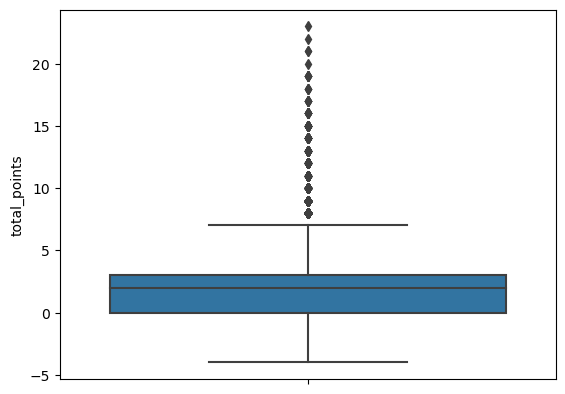

In [16]:
fig, ax = plt.subplots()
sns.boxplot(data=fpl_23, y='total_points')
ax.set_ylabel('total_points')
plt.show()

In [17]:
# We repeat the same process as before
player_means = fpl_23.groupby('name')['minutes'].mean()

# Filter for players with mean minutes fewer than 45
players_with_mean_zero = player_means[player_means <45]

# Remove players with mean minutes fewer than 45 from the original DataFrame
fpl_23 = fpl_23[~fpl_23['name'].isin(players_with_mean_zero.index)]

C:\Users\Joseph\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


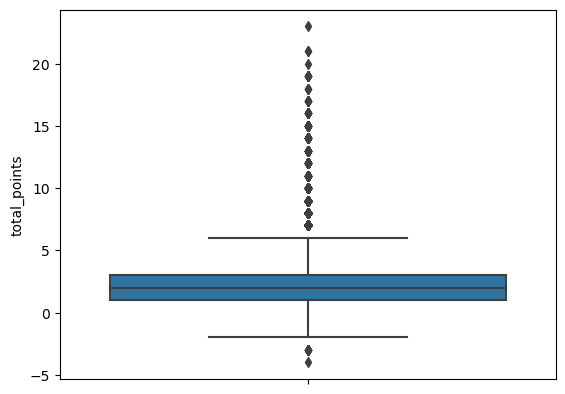

In [18]:
fig, ax = plt.subplots()
sns.boxplot(data=fpl_23, y='total_points')
ax.set_ylabel('total_points')
plt.show()

In [19]:
# We repeat the same process as before
player_means = fpl_23.groupby('name')['minutes'].mean()

# Filter for players with mean minutes fewer than 60
players_with_mean_zero = player_means[player_means <60]

# Remove players with mean minutes fewer than 60 from the original DataFrame
fpl_23 = fpl_23[~fpl_23['name'].isin(players_with_mean_zero.index)]

C:\Users\Joseph\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


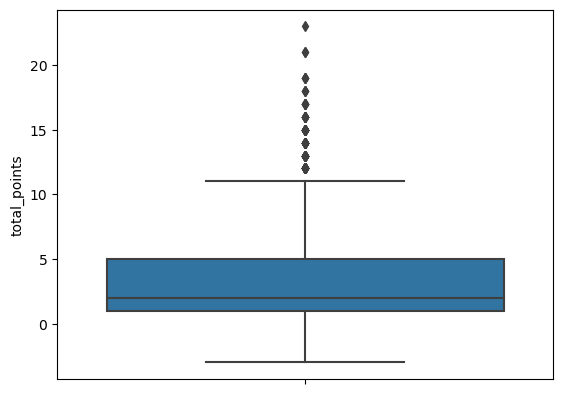

In [20]:
fig, ax = plt.subplots()
sns.boxplot(data=fpl_23, y='total_points')
ax.set_ylabel('total_points')
plt.show()

### We decided that we will not include any players with a mean value less than 60 minutes of playtime.
This way we focus on the players which are usually in the starting lineup, which are also more likely to score more points, making them a better choice for the Fantasy Team.

#### Interquaretile Range Method (IQR)

In [21]:
Q1 = fpl_23['total_points'].quantile(0.25)
Q3 = fpl_23['total_points'].quantile(0.75)
IQR = Q3-Q1
upper_whisker = min(Q3 + 1.5*IQR, max(fpl_23['total_points']))
lower_whisker = max(Q1 - 1.5*IQR, min(fpl_23['total_points']))
print("The Upper whisker is {} and the Lower whisker is {}.".format(upper_whisker,lower_whisker))

The Upper whisker is 11.0 and the Lower whisker is -5.0.


### Data Visualizations.

C:\Users\Joseph\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0, 0.5, 'Total points')

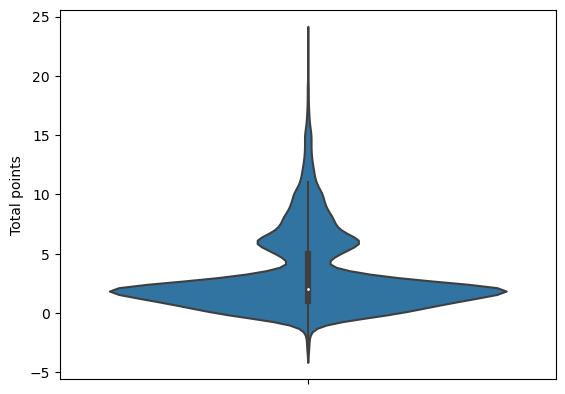

In [22]:
#Violin plot
fig, ax = plt.subplots()
sns.violinplot(data=fpl_23, y='total_points')
ax.set_ylabel('Total points')

C:\Users\Joseph\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Joseph\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Joseph\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0, 0.5, 'Total points')

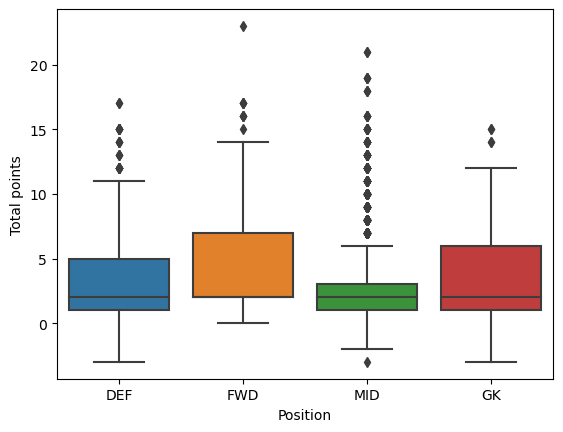

In [23]:
fig, ax = plt.subplots()
sns.boxplot(data=fpl_23, y='total_points', x='position')
ax.set_xlabel('Position')
ax.set_ylabel('Total points')

C:\Users\Joseph\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Joseph\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Joseph\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 9.444444444444438, 'total points')

<Figure size 640x480 with 0 Axes>

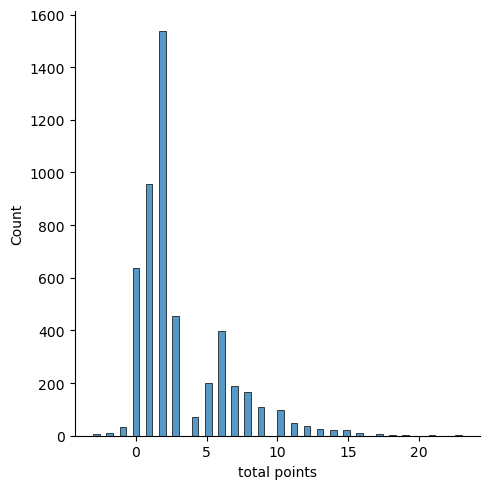

In [24]:
plt.figure()
sns.displot(fpl_23, x='total_points')
plt.xlabel('total points')

C:\Users\Joseph\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Joseph\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Joseph\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Joseph\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is

Text(12.674236111111108, 0.5, 'Number of players')

<Figure size 640x480 with 0 Axes>

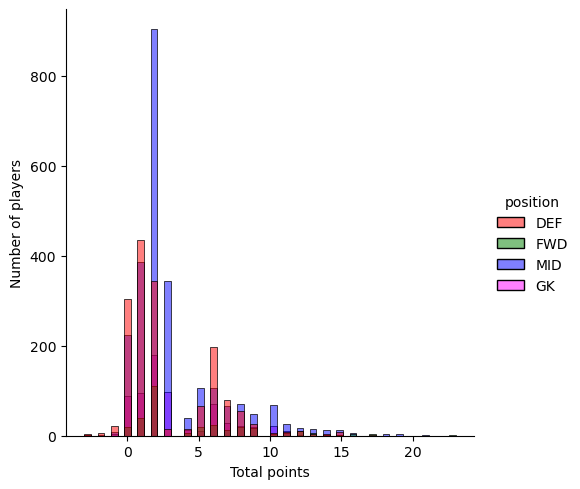

In [25]:
plt.figure()
colors = ['red', 'green','blue','magenta']
sns.displot(fpl_23, x='total_points',hue="position", palette=colors)
plt.xlabel('Total points')
plt.ylabel("Number of players")

C:\Users\Joseph\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Joseph\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Joseph\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Joseph\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with

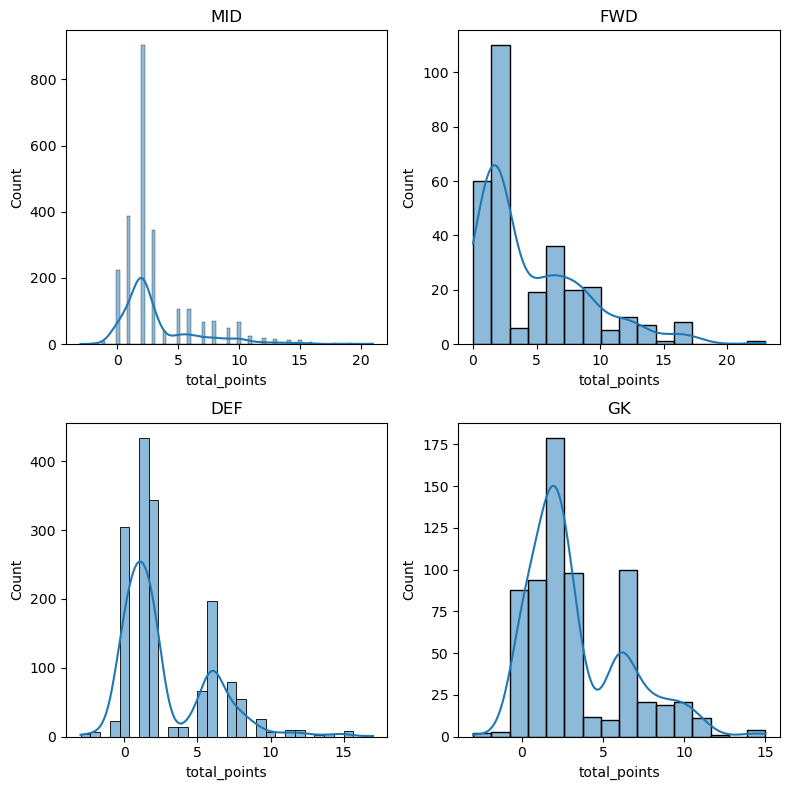

In [26]:
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

# Data filtered by position
dfMid = fpl_23[fpl_23['position'] == 'MID']
dfFwd = fpl_23[fpl_23['position'] == 'FWD']
dfDef = fpl_23[fpl_23['position'] == 'DEF']
dfGK = fpl_23[fpl_23['position'] == 'GK']

# Plot each dataset on a specific axis
sns.histplot(dfMid, x='total_points', ax=axs[0, 0], kde=True)
axs[0, 0].set_title('MID')
sns.histplot(dfFwd, x='total_points', ax=axs[0, 1], kde=True)
axs[0, 1].set_title('FWD')
sns.histplot(dfDef, x='total_points', ax=axs[1, 0], kde=True)
axs[1, 0].set_title('DEF')
sns.histplot(dfGK, x='total_points', ax=axs[1, 1], kde=True)
axs[1, 1].set_title('GK')

plt.tight_layout()
plt.show()

C:\Users\Joseph\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Joseph\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='minutes', ylabel='xP'>

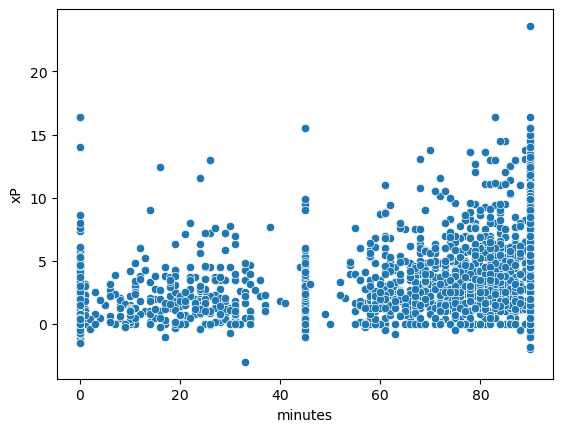

In [27]:
fig, ax = plt.subplots()
sns.scatterplot(data=fpl_23, x = "minutes", y = "xP")

upper_limit :  12.855607945275247
lower_limit :  -6.498238690124692
Mean Value :  3.178684627575277
Median Value :  2.0
1st Standard Deviation :  3.2256411058999896


C:\Users\Joseph\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Joseph\AppData\Local\Temp\ipykernel_2328\1872405829.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fpl_23["total_points"], ax=ax_hist,kde=False,norm_hist=True)


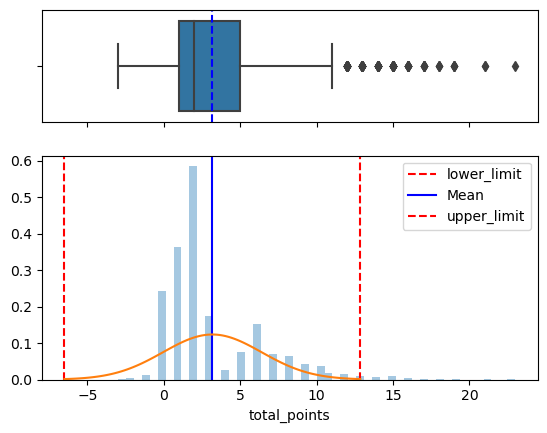

In [28]:
from scipy.stats import norm

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (0.5, 1)})
median=fpl_23.total_points.median()
mean=fpl_23.total_points.mean()
std = fpl_23.total_points.std()
upper_limit = mean + std*3
lower_limit = mean - std*3
print("upper_limit : ", upper_limit)
print("lower_limit : ",lower_limit)

sns.boxplot(data=fpl_23, x="total_points", ax=ax_box)
ax_box.axvline(mean, color='b', linestyle='--')
sns.distplot(fpl_23["total_points"], ax=ax_hist,kde=False,norm_hist=True)
ax_hist.axvline(lower_limit, color='r', linestyle='--')
ax_hist.axvline(mean, color='b', linestyle='-')
ax_hist.axvline(upper_limit, color='r', linestyle='--')
plt.legend({'Mean':mean})
ax_box.set(xlabel='')
x = np.linspace(mean - 3*std, mean + 3*std, 100)
plt.plot(x, norm.pdf(x, mean, std))
plt.legend({"lower_limit":lower_limit,'Mean':mean,'upper_limit':upper_limit})
print("Mean Value : ",mean)
print("Median Value : ",median)
print("1st Standard Deviation : ",std)
plt.show()

#### One hot encoding

In [29]:
onehot_encoder=ce.OneHotEncoder(cols=['position'],handle_unknown='return_nan', return_df=True,
use_cat_names=True)
#fit and transform data
fpl_23=onehot_encoder.fit_transform(fpl_23)
fpl_23.head()

C:\Users\Joseph\anaconda3\Lib\site-packages\category_encoders\utils.py:28: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(cols):
C:\Users\Joseph\anaconda3\Lib\site-packages\category_encoders\utils.py:50: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return pd.api.types.is_categorical_dtype(dtype)
C:\Users\Joseph\anaconda3\Lib\site-packages\category_encoders\utils.py:50: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return pd.api.types.is_categorical_dtype(dtype)
C:\Users\Joseph\anaconda3\Lib\site-packages\category_encoders\utils.py:50: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) inst

,name,position_DEF,position_FWD,position_MID,position_GK,team,xP,assists,bonus,bps,...,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards
3,Fabian Schär,1.0,0.0,0.0,0.0,Newcastle,3.3,0.0,0.0,10.0,...,1.0,5.0,2.0,2.0,121324.0,161290.0,39966.0,48.0,True,0.0
5,Brennan Johnson,0.0,1.0,0.0,0.0,Nott'm Forest,1.5,0.0,0.0,6.0,...,1.0,1.0,10.0,2.0,-9887.0,10753.0,20640.0,59.0,True,0.0
6,Cheick Doucouré,0.0,0.0,1.0,0.0,Crystal Palace,1.5,0.0,0.0,6.0,...,1.0,2.0,0.0,1.0,-388.0,1124.0,1512.0,50.0,True,1.0
14,Alisson Ramses Becker,0.0,0.0,0.0,1.0,Liverpool,2.5,0.0,0.0,21.0,...,2.0,3.0,0.0,2.0,-105280.0,15811.0,121091.0,54.0,False,0.0
28,Rodrigo Hernandez,0.0,0.0,1.0,0.0,Man City,3.7,1.0,0.0,27.0,...,0.0,4.0,0.0,6.0,-30542.0,3740.0,34282.0,57.0,True,0.0


### This is our 4 datasets: 
- Dataset with outliers
- Dataset without outliers
- Scaled Dataset with outliers
- Scaled Dataset without outliers

In [30]:
#Dataset without outliers
fpl_23_no_outl = fpl_23[ (fpl_23['total_points'] >= minimum) & (fpl_23['total_points'] <= maximum) ]

# Scaled dataset with outliers
fpl_23_scaled = fpl_23.select_dtypes(include=['number'])
fpl_23_scaled = fpl_23_scaled.drop(['position_GK', 'position_DEF', 'position_MID', 'position_FWD', 'total_points'], axis=1)
rscaler = RobustScaler()

robustRescaledX = rscaler.fit_transform(fpl_23_scaled)
fpl_23_scaled = pd.DataFrame(robustRescaledX, columns=fpl_23_scaled.columns)
cols_to_add = ['position_GK', 'position_DEF', 'position_MID', 'position_FWD', 'total_points']

for col in cols_to_add:
    fpl_23_scaled[col] = fpl_23[col].reset_index(drop=True)


# Scaled dataset without outliers
fpl_23_scaled_no_outl = fpl_23_no_outl.select_dtypes(include=['number'])
fpl_23_scaled_no_outl = fpl_23_scaled_no_outl.drop(['position_GK', 'position_DEF', 'position_MID', 'position_FWD', 'total_points'], axis=1)
rscaler2 = RobustScaler()

robustRescaledX2 = rscaler2.fit_transform(fpl_23_scaled_no_outl)
fpl_23_scaled_no_outl = pd.DataFrame(robustRescaledX2, columns=fpl_23_scaled_no_outl.columns)
cols_to_add = ['position_GK', 'position_DEF', 'position_MID', 'position_FWD', 'total_points']

for col in cols_to_add:
    fpl_23_scaled_no_outl[col] = fpl_23_no_outl[col].reset_index(drop=True)
    

In [31]:
fpl_23[['xP','creativity','expected_assists','expected_goal_involvements','expected_goals','expected_goals_conceded','ict_index','influence','threat']]=fpl_23[['xP','creativity','expected_assists','expected_goal_involvements','expected_goals','expected_goals_conceded','ict_index','influence','threat']].astype(float)


In [32]:
x=fpl_23.select_dtypes(include=['number'])
x=x.drop(columns=['total_points'])
y=fpl_23['total_points']

In [33]:
x_no_outl=fpl_23_no_outl.select_dtypes(include=['number'])
x_no_outl=x_no_outl.drop(columns=['total_points'])
y_no_outl=fpl_23_no_outl['total_points']

In [34]:
x_scaled=fpl_23_scaled.select_dtypes(include=['number'])
x_scaled=x_scaled.drop(columns=['total_points'])
# we use the y for our target value here

In [35]:
x_scaled_no_outl=fpl_23_scaled_no_outl.select_dtypes(include=['number'])
x_scaled_no_outl=x_scaled_no_outl.drop(columns=['total_points'])
# we use the y_no_outl for our target value here

In [36]:
y.value_counts().sort_index(ascending=True)

total_points
-3.0        7
-2.0        9
-1.0       33
 0.0      636
 1.0      955
 2.0     1536
 3.0      456
 4.0       71
 5.0      202
 6.0      397
 7.0      187
 8.0      167
 9.0      111
 10.0      99
 11.0      50
 12.0      38
 13.0      25
 14.0      20
 15.0      23
 16.0      10
 17.0       6
 18.0       3
 19.0       4
 21.0       2
 23.0       1
Name: count, dtype: int64

#### Feature selection before classification

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:   16.1s finished

[2023-11-12 11:23:00] Features: 1/5 -- score: 0.40828970548098165[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   14.1s finished

[2023-11-12 11:23:15] Features: 2/5 -- score: 0.5189208412938656[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:   13.1s finished

[2023-11-12 11:23:28] Features: 3/5 -- score: 0.6076179192615934[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1

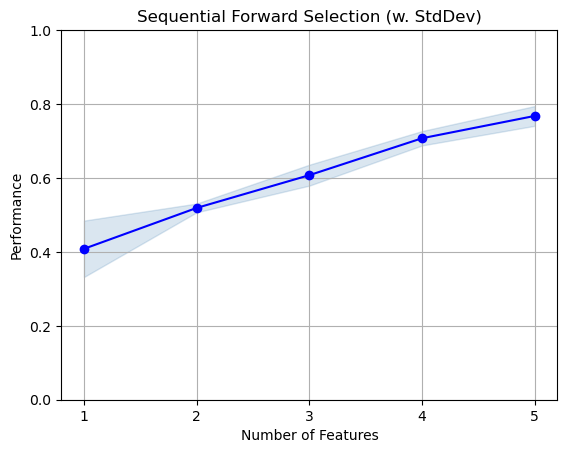

In [37]:
knn = KNeighborsClassifier()

sfs = SFS(knn, 
          k_features=5, 
          forward=True, 
          floating=False, 
          scoring='accuracy',
          verbose=2,
          cv=5)

sfs = sfs.fit(x_scaled_no_outl, y_no_outl)

fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')

plt.ylim([0, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

#### Classification
Class 1: below or equal 0 points   
Class 2: 1 points    
Class 3: 2 points  
Class 4: from 3 to 6 points  
Class 5: from 7 to 9 points  
Class 6: from 10 points and above

In [38]:
# new Y for classification for the dataset with outliers
ycl = pd.cut(y, bins = [-np.inf, 0, 1, 2, 6, 9, np.inf], labels =['Class 1','Class 2','Class 3','Class 4','Class 5','Class 6'])
ycl.value_counts()

total_points
Class 3    1536
Class 4    1126
Class 2     955
Class 1     685
Class 5     465
Class 6     281
Name: count, dtype: int64

In [39]:
# new Y for classification for the dataset without outliers
y_no_outl_cl = pd.cut(y_no_outl, bins = [-np.inf, 0, 1, 2, 6, 9, np.inf], labels =['Class 1','Class 2','Class 3','Class 4','Class 5','Class 6'])
y_no_outl_cl.value_counts()

total_points
Class 3    1536
Class 4    1126
Class 2     955
Class 1     685
Class 5     465
Class 6     149
Name: count, dtype: int64

#### Feature selection after classification

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:   19.2s finished

[2023-11-12 11:24:14] Features: 1/5 -- score: 0.5159926410792034[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   15.6s finished

[2023-11-12 11:24:30] Features: 2/5 -- score: 0.6201721791110123[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:   15.2s finished

[2023-11-12 11:24:45] Features: 3/5 -- score: 0.6820220909047704[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

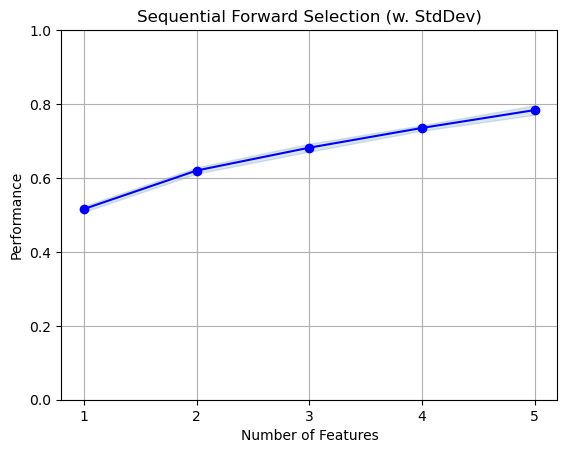

In [40]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, make_scorer

f1 = make_scorer(f1_score, average='macro')

knn = KNeighborsClassifier()

sfs = SFS(knn, 
          k_features=5, 
          forward=True, 
          floating=False, 
          scoring=f1,
          verbose=2,
          cv=5)

sfs = sfs.fit(x_scaled, ycl)

fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')

plt.ylim([0, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

#### Correlation matrix - Heatmap

<Figure size 640x480 with 0 Axes>

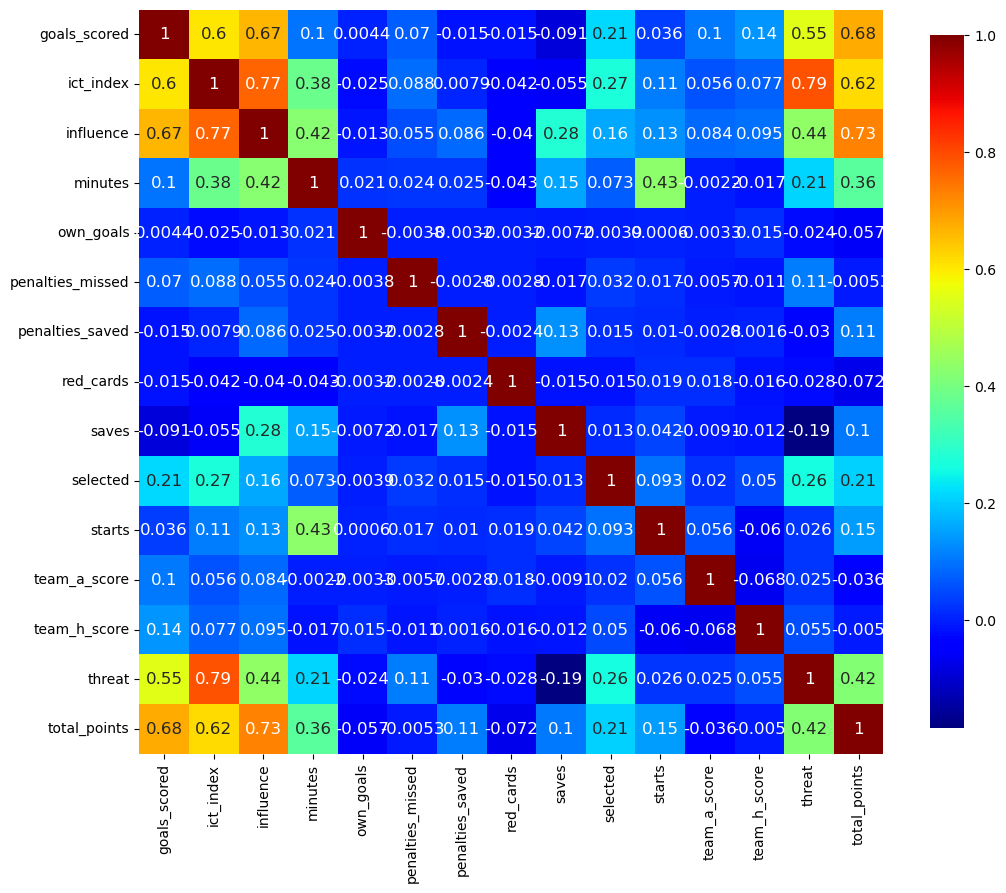

In [41]:
numeric_fpl_23 = fpl_23.select_dtypes(include=['number'])
coln=numeric_fpl_23.columns.get_loc('total_points')
cols_to_select = list(range(16, 30)) + [coln] 
f15=numeric_fpl_23.iloc[:,cols_to_select]
from matplotlib import cm as cm

plt.figure()

corr = f15.corr(method='pearson')
cmap = plt.colormaps['jet']
#cmap = cm.get_cmap('jet', 30)
_, ax = plt.subplots( figsize = ( 12 , 10 ) )
sns.heatmap(corr, cmap = cmap,  square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = { 'fontsize' : 12 }, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()

<Figure size 640x480 with 0 Axes>

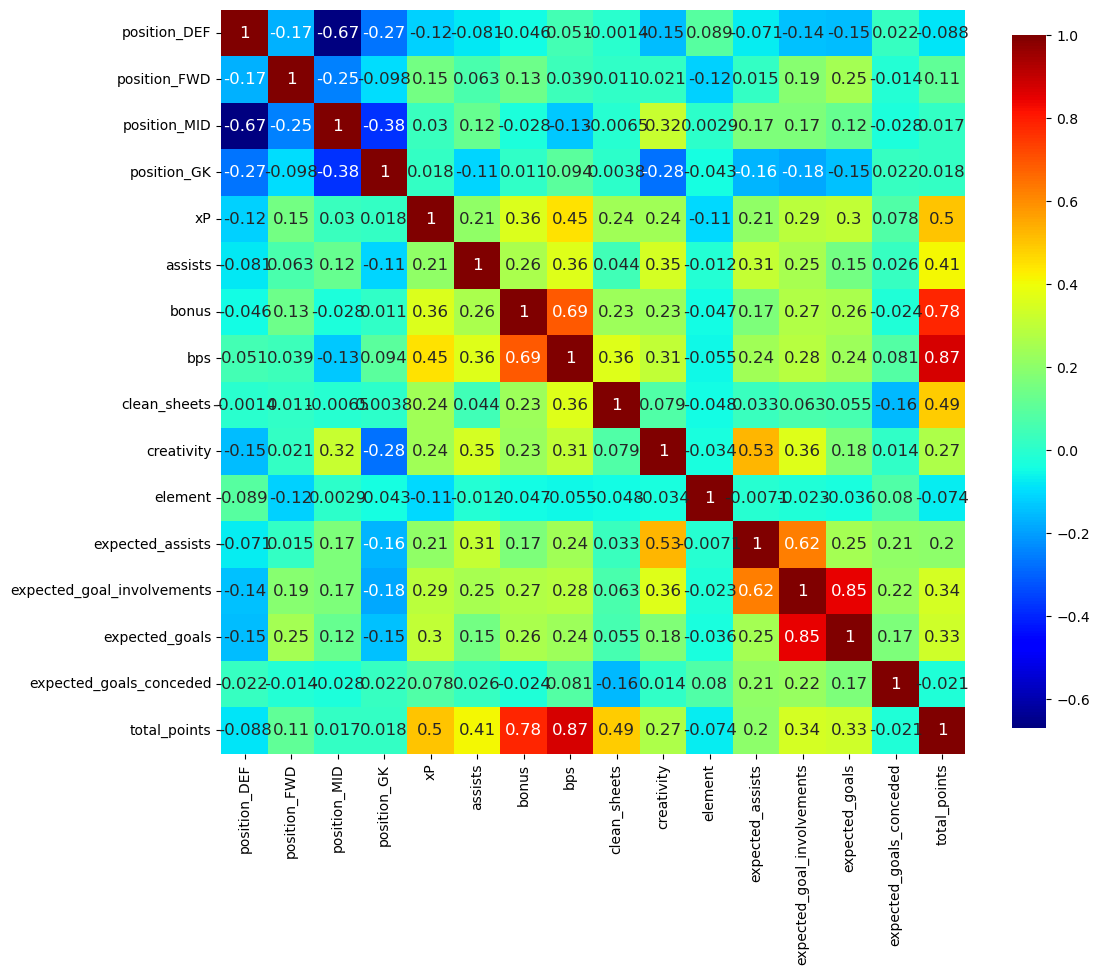

In [42]:
numeric_fpl_23 = fpl_23.select_dtypes(include=['number'])
coln=numeric_fpl_23.columns.get_loc('total_points')
cols_to_select = list(range(0,15)) + [coln] 
f15=numeric_fpl_23.iloc[:,cols_to_select]
from matplotlib import cm as cm

plt.figure()

corr = f15.corr(method='pearson')
cmap = plt.colormaps['jet']
#cmap = cm.get_cmap('jet', 30)
_, ax = plt.subplots( figsize = ( 12 , 10 ) )
sns.heatmap(corr, cmap = cmap,  square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = { 'fontsize' : 12 }, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()

<Figure size 640x480 with 0 Axes>

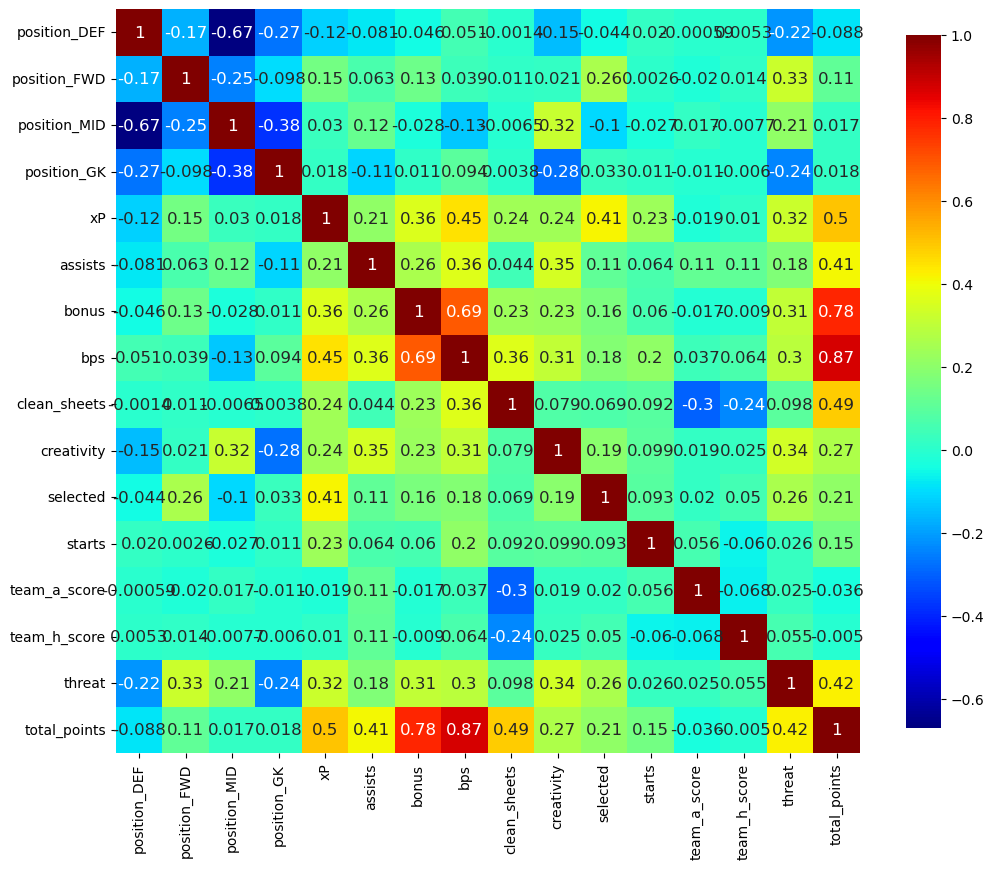

In [43]:
numeric_fpl_23 = fpl_23.select_dtypes(include=['number'])
coln=numeric_fpl_23.columns.get_loc('total_points')
cols_to_select = list(range(0, 10))+ list(range(25, 30)) + [coln] 
f15=numeric_fpl_23.iloc[:,cols_to_select]
from matplotlib import cm as cm

plt.figure()

corr = f15.corr(method='pearson')
cmap = plt.colormaps['jet']
#cmap = cm.get_cmap('jet', 30)
_, ax = plt.subplots( figsize = ( 12 , 10 ) )
sns.heatmap(corr, cmap = cmap,  square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = { 'fontsize' : 12 }, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()

#### Random Forest

best combination (ACC: 0.973): (0, 1, 2, 5, 6, 7, 15, 16, 19, 20, 21, 24, 34)

all subsets:
 {1: {'feature_idx': (7,), 'cv_scores': array([0.58484881, 0.57897992, 0.5989891 , 0.60272903, 0.59867975]), 'avg_score': 0.592845322684964, 'feature_names': ('bps',)}, 2: {'feature_idx': (7, 15), 'cv_scores': array([0.64758806, 0.66025608, 0.64284876, 0.6691549 , 0.63518615]), 'avg_score': 0.6510067903156471, 'feature_names': ('bps', 'goals_conceded')}, 3: {'feature_idx': (0, 7, 15), 'cv_scores': array([0.70416395, 0.68522765, 0.6966003 , 0.70286616, 0.68616703]), 'avg_score': 0.6950050161257215, 'feature_names': ('position_DEF', 'bps', 'goals_conceded')}, 4: {'feature_idx': (0, 7, 15, 34), 'cv_scores': array([0.76076451, 0.73770451, 0.75417334, 0.75544773, 0.73349885]), 'avg_score': 0.7483177889750934, 'feature_names': ('position_DEF', 'bps', 'goals_conceded', 'yellow_cards')}, 5: {'feature_idx': (0, 7, 15, 19, 34), 'cv_scores': array([0.79920329, 0.78947097, 0.79090006, 0.79141442, 0.78550391

(<Figure size 1000x1000 with 1 Axes>,
 <Axes: xlabel='Number of Features', ylabel='Performance'>)

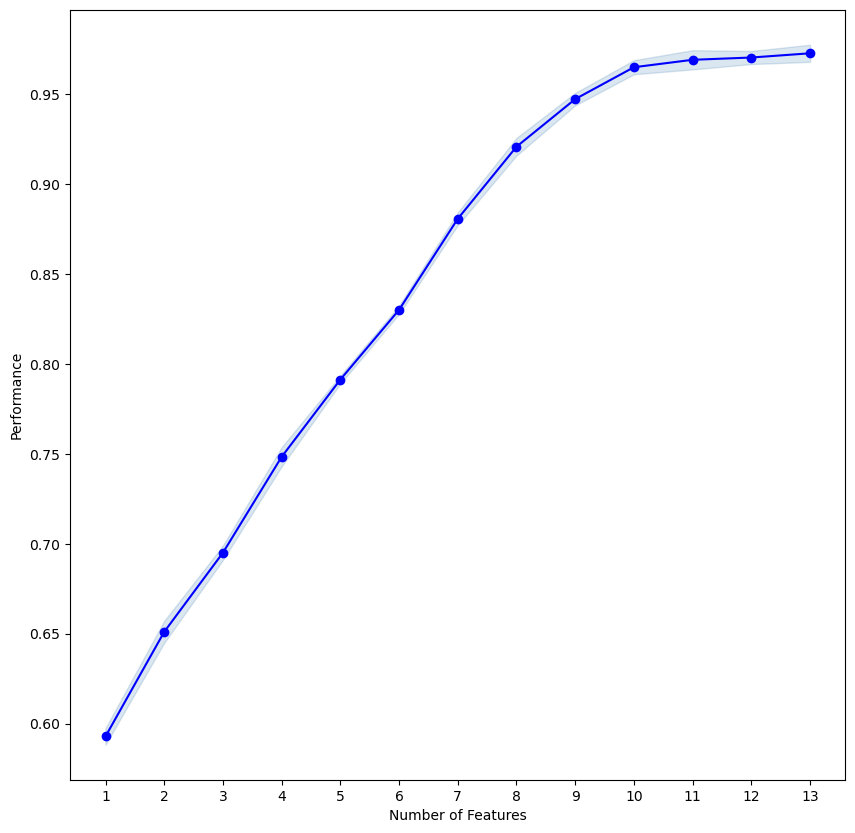

In [44]:
f1 = make_scorer(f1_score, average='macro')

rfc = RandomForestClassifier()
sfs_range = SFS(estimator=rfc, 
           k_features=(2, 13),
           forward=True, 
           floating=False, 
           scoring=f1,
           cv=5)

sfs_range = sfs_range.fit(x, ycl)

print('best combination (ACC: %.3f): %s\n' % (sfs_range.k_score_, sfs_range.k_feature_idx_))
print('all subsets:\n', sfs_range.subsets_)
plt.rcParams["figure.figsize"] = (10,10)
plot_sfs(sfs_range.get_metric_dict(), kind='std_err')

In [45]:
best_feature_names = x.columns[list(sfs_range.k_feature_idx_)]
best_feature_names

Index(['position_DEF', 'position_FWD', 'position_MID', 'assists', 'bonus',
       'bps', 'goals_conceded', 'goals_scored', 'minutes', 'own_goals',
       'penalties_missed', 'saves', 'yellow_cards'],
      dtype='object')

#### Decision Tree

best combination (ACC: 0.961): (0, 1, 2, 5, 6, 7, 15, 16, 19, 20, 21, 24, 34)

all subsets:
 {1: {'feature_idx': (7,), 'cv_scores': array([0.58676364, 0.57897992, 0.5992624 , 0.60130479, 0.59942125]), 'avg_score': 0.5931463994148458, 'feature_names': ('bps',)}, 2: {'feature_idx': (7, 15), 'cv_scores': array([0.64662876, 0.65152781, 0.64475466, 0.66623277, 0.64769769]), 'avg_score': 0.6513683382753177, 'feature_names': ('bps', 'goals_conceded')}, 3: {'feature_idx': (2, 7, 15), 'cv_scores': array([0.70042387, 0.69171833, 0.68387021, 0.69133687, 0.68225229]), 'avg_score': 0.6899203136227202, 'feature_names': ('position_MID', 'bps', 'goals_conceded')}, 4: {'feature_idx': (2, 7, 15, 34), 'cv_scores': array([0.75376726, 0.72472171, 0.72785989, 0.74980239, 0.72679782]), 'avg_score': 0.7365898147910875, 'feature_names': ('position_MID', 'bps', 'goals_conceded', 'yellow_cards')}, 5: {'feature_idx': (2, 7, 15, 24, 34), 'cv_scores': array([0.77412529, 0.76476625, 0.772132  , 0.77810016, 0.7681137

(<Figure size 1000x1000 with 1 Axes>,
 <Axes: xlabel='Number of Features', ylabel='Performance'>)

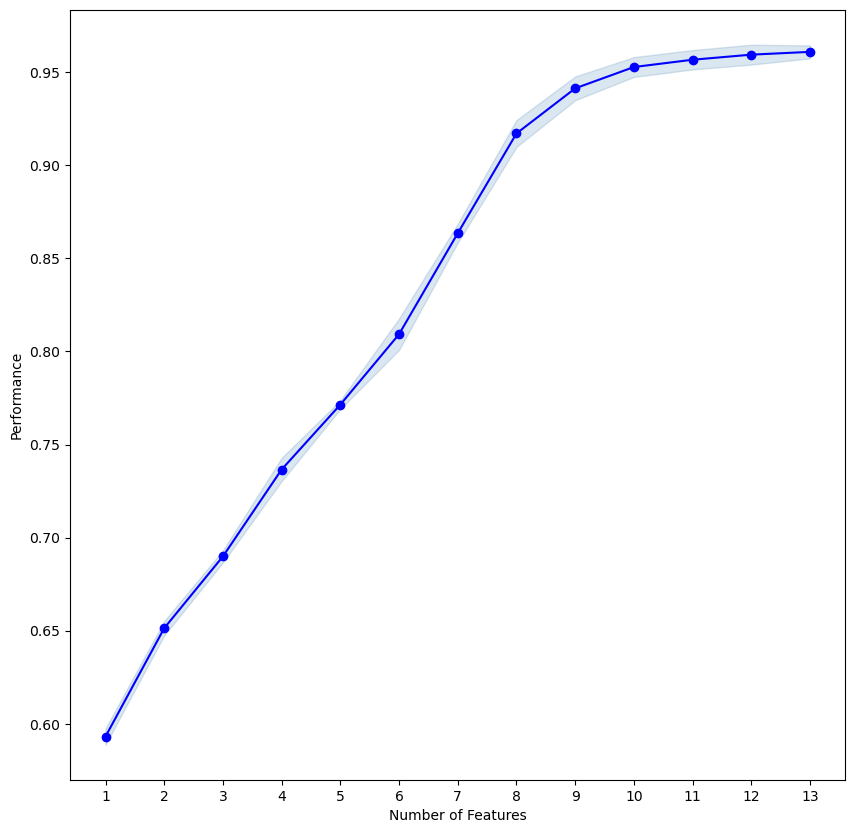

In [46]:
f1 = make_scorer(f1_score, average='macro')

decisionTree = DecisionTreeClassifier()

sfs_range = SFS(estimator=decisionTree, 
           k_features=(2, 13),
           forward=True, 
           floating=False, 
           scoring=f1,
           cv=5)

sfs_range = sfs_range.fit(x, ycl)

print('best combination (ACC: %.3f): %s\n' % (sfs_range.k_score_, sfs_range.k_feature_idx_))
print('all subsets:\n', sfs_range.subsets_)
plt.rcParams["figure.figsize"] = (10,10)
plot_sfs(sfs_range.get_metric_dict(), kind='std_err')

In [47]:
best_feature_names = x.columns[list(sfs_range.k_feature_idx_)]
best_feature_names

Index(['position_DEF', 'position_FWD', 'position_MID', 'assists', 'bonus',
       'bps', 'goals_conceded', 'goals_scored', 'minutes', 'own_goals',
       'penalties_missed', 'saves', 'yellow_cards'],
      dtype='object')

#### Naive Bayes Classifier

best combination (ACC: 0.636): (0, 1, 2, 7, 8, 10, 14, 15, 18, 19, 27, 28, 34)

all subsets:
 {1: {'feature_idx': (7,), 'cv_scores': array([0.50059599, 0.49230501, 0.52225543, 0.50465566, 0.51401983]), 'avg_score': 0.5067663831320025, 'feature_names': ('bps',)}, 2: {'feature_idx': (0, 7), 'cv_scores': array([0.58142296, 0.55082557, 0.56957426, 0.56489707, 0.58194295]), 'avg_score': 0.5697325625904334, 'feature_names': ('position_DEF', 'bps')}, 3: {'feature_idx': (0, 7, 15), 'cv_scores': array([0.61818948, 0.56968752, 0.60397601, 0.59300976, 0.59996406]), 'avg_score': 0.5969653675835268, 'feature_names': ('position_DEF', 'bps', 'goals_conceded')}, 4: {'feature_idx': (0, 2, 7, 15), 'cv_scores': array([0.62743177, 0.59572685, 0.59990889, 0.60773867, 0.59842359]), 'avg_score': 0.6058459528965416, 'feature_names': ('position_DEF', 'position_MID', 'bps', 'goals_conceded')}, 5: {'feature_idx': (0, 2, 7, 15, 27), 'cv_scores': array([0.62751109, 0.60732623, 0.60473412, 0.59552833, 0.60115076]),

(<Figure size 1000x1000 with 1 Axes>,
 <Axes: xlabel='Number of Features', ylabel='Performance'>)

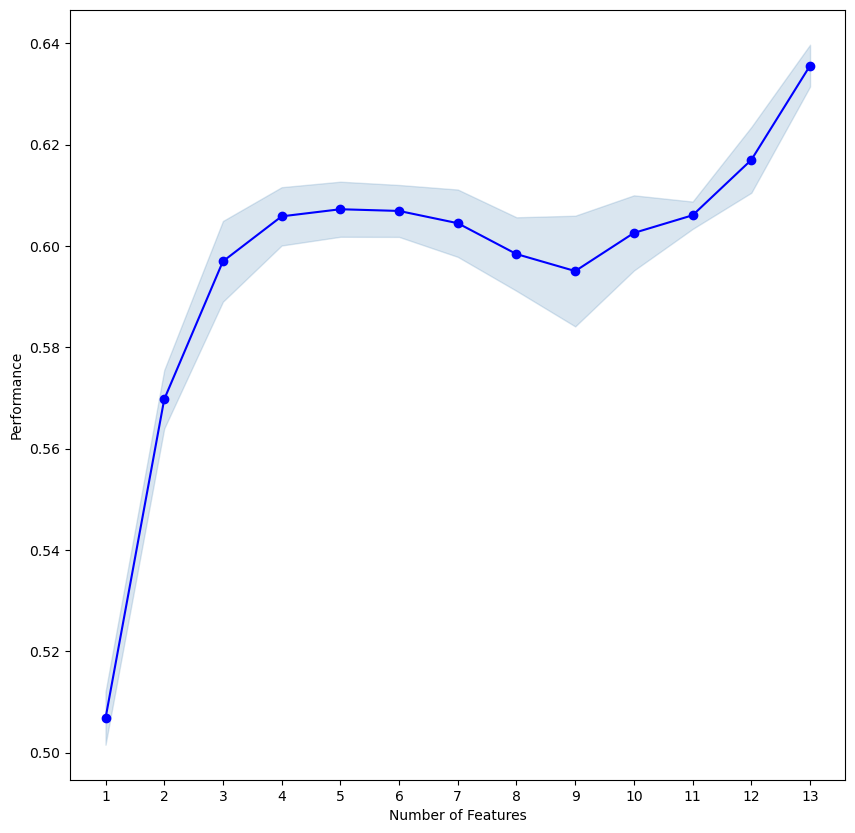

In [48]:
f1 = make_scorer(f1_score, average='macro')

naivegauss = GaussianNB()

sfs_range = SFS(estimator=naivegauss, 
           k_features=(2, 13),
           forward=True, 
           floating=False, 
           scoring=f1,
           cv=5)

sfs_range = sfs_range.fit(x, ycl)

print('best combination (ACC: %.3f): %s\n' % (sfs_range.k_score_, sfs_range.k_feature_idx_))
print('all subsets:\n', sfs_range.subsets_)
plt.rcParams["figure.figsize"] = (10,10)
plot_sfs(sfs_range.get_metric_dict(), kind='std_err')

In [49]:
best_feature_names = x.columns[list(sfs_range.k_feature_idx_)]
best_feature_names

Index(['position_DEF', 'position_FWD', 'position_MID', 'bps', 'clean_sheets',
       'element', 'expected_goals_conceded', 'goals_conceded', 'influence',
       'minutes', 'team_a_score', 'team_h_score', 'yellow_cards'],
      dtype='object')

In [52]:
X_sfs = sfs_range.transform(x)

In [57]:
X_sfs = x.loc[:,['position_DEF', 'position_FWD', 'position_MID', 'assists', 'bonus',
       'bps', 'goals_conceded', 'goals_scored', 'minutes', 'own_goals',
       'penalties_missed', 'saves', 'yellow_cards']]

In [58]:
#Dividing data into test & train splitting 80% data for training anf 20% for test
from sklearn.model_selection import train_test_split # Library to split datset into test and train
X_train, X_test, y_train, y_test = train_test_split(X_sfs, ycl, test_size=0.20)
print('There are {} samples in the training set and {} samples in the test set'.format(X_train.shape[0], X_test.shape[0]))

There are 4038 samples in the training set and 1010 samples in the test set


In [59]:
plt.rcParams["figure.figsize"] = (5,5)

# Making a list of all classifiers
classifier_model = [GaussianNB(), SVC(), DecisionTreeClassifier(), RandomForestClassifier(), SGDClassifier(), AdaBoostClassifier()]

# Creating empty list to store the performance details
classifier_model_list= []
classifier_accuracy_test = []
classifier_accuracy_train = []
f1score = []
precisionscore = []
recallscore = []
#avg_pre_rec_score = []
cv_score = []


for classifier_list in classifier_model:
    classifier = classifier_list
 
    # Fitting the training set into classification model
    classifier.fit(X_train,y_train)
    
    # Predicting the output on test dataset
    y_pred_test = classifier.predict(X_test)    
    score_test = accuracy_score(y_test, y_pred_test)
    
    # Predicting the output on training datset
    y_pred_train = classifier.predict(X_train) 
    score_train = accuracy_score(y_train, y_pred_train)
    
    # Cross Validation Score on training test
    scores = cross_val_score(classifier, X_train,y_train, cv=10)
    cv_score.append(scores.mean())
    
    #Keeping the model and accuracy score into a list
    classifier_model_list.append(classifier_list.__class__.__name__)
    classifier_accuracy_test.append(round(score_test,4))
    classifier_accuracy_train.append(round(score_train,4))
    
    #Precision, Recall and F1 score
    f1score.append(f1_score(y_test, y_pred_test, average='macro'))
    precisionscore.append(precision_score(y_test, y_pred_test, average='macro', zero_division=0))
    recallscore.append(recall_score(y_test, y_pred_test, average='macro'))

In [60]:
#Creating pandas dataframe with Model and corresponding accuracy
#accuracy_df = pd.DataFrame({'Model':classifier_model_list , 'Test Accuracy':classifier_accuracy_test, 'Train Accuracy' :classifier_accuracy_test , 'Precision':precisionscore, 'Recall':recallscore ,'F1 Score':f1score},index=None)
accuracy_df = pd.DataFrame({'Model':classifier_model_list , 'Cross Val Score':cv_score, 'Test Accuracy' :classifier_accuracy_test , 'Precision':precisionscore, 'Recall':recallscore, 'F1 Score':f1score})

# Calculating Average Accuracy = (Test + Train)/2
accuracy_df['Average_Accuracy'] =  (accuracy_df['Cross Val Score'] + accuracy_df['Test Accuracy'] )/ 2

#Arranging the Columns
print("\n*------------------------------    CLASSIFICATION MODEL PERFORMANCE EVALUATION      ---------------------*\n")
accuracy_df = accuracy_df[['Model','Cross Val Score', 'Test Accuracy', 'Average_Accuracy','Precision', 'Recall', 'F1 Score']]  # This will arrange the columns in the order we want

#Sorting the Columns based on Average Accuracy
accuracy_df.sort_values('Average_Accuracy', axis=0, ascending=False, inplace=True) # Sorting the data with highest accuracy in the top
accuracy_df
#accuracy_df.transpose()


*------------------------------    CLASSIFICATION MODEL PERFORMANCE EVALUATION      ---------------------*



,Model,Cross Val Score,Test Accuracy,Average_Accuracy,Precision,Recall,F1 Score
3,RandomForestClassifier,0.975985,0.9842,0.980093,0.978614,0.975230,0.976734
2,DecisionTreeClassifier,0.969050,0.9752,0.972125,0.968174,0.955297,0.961363
1,SVC,0.618385,0.6257,0.622043,0.723891,0.577833,0.616147
4,SGDClassifier,0.603733,0.5911,0.597416,0.704729,0.641591,0.617510
5,AdaBoostClassifier,0.514357,0.5099,0.512129,0.419632,0.525367,0.439857
0,GaussianNB,0.416782,0.4079,0.412341,0.729919,0.472626,0.422730
